# 0. 빠른 시작

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f'Shape of X [N, C, H, W]: {X.shape}')
  print(f'Shape of y: {y.shape} {y.type}')
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) <built-in method type of Tensor object at 0x7bbe5c926750>


In [5]:
# 모델 만들기
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
    )
print( f'Using {device} device')

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [7]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # 예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f'loss: {loss:>7f}, [{current:>5d}/{size:>5d}]')

In [8]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f'Test Error: \n Accuracy: {100*correct:>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [9]:
epochs = 5
for t in range(epochs):
  print(f'Epoch {t+1}\n-------------------------------')
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print('Done!')

Epoch 1
-------------------------------
loss: 2.305201, [   64/60000]
loss: 2.296330, [ 6464/60000]
loss: 2.279899, [12864/60000]
loss: 2.273266, [19264/60000]
loss: 2.259978, [25664/60000]
loss: 2.234637, [32064/60000]
loss: 2.235548, [38464/60000]
loss: 2.209083, [44864/60000]
loss: 2.201970, [51264/60000]
loss: 2.175474, [57664/60000]
Test Error: 
 Accuracy: 42.3%, Avg loss: 2.173051 

Epoch 2
-------------------------------
loss: 2.178826, [   64/60000]
loss: 2.169657, [ 6464/60000]
loss: 2.122451, [12864/60000]
loss: 2.138447, [19264/60000]
loss: 2.093911, [25664/60000]
loss: 2.035315, [32064/60000]
loss: 2.067497, [38464/60000]
loss: 1.994123, [44864/60000]
loss: 1.995285, [51264/60000]
loss: 1.938589, [57664/60000]
Test Error: 
 Accuracy: 51.6%, Avg loss: 1.931185 

Epoch 3
-------------------------------
loss: 1.955846, [   64/60000]
loss: 1.924670, [ 6464/60000]
loss: 1.821087, [12864/60000]
loss: 1.864874, [19264/60000]
loss: 1.764145, [25664/60000]
loss: 1.707905, [32064/600

In [10]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [11]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [12]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


# 1. 텐서(Tensor)

In [2]:
import torch
import numpy as np

In [14]:
# 데이터 직접 생성
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [15]:
# 넘파이 배열로부터 생성
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [16]:
# 다른 텐서로부터 생성
x_ones = torch.ones_like(x_data) #x_data의 속성을 유지
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) #x_data의 속성을 덮어씀
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9914, 0.6008],
        [0.3416, 0.9498]]) 



In [19]:
#무작위 또는 상수 값을 사용하기
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8385, 0.2343, 0.5126],
        [0.1426, 0.2954, 0.5658]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [20]:
# 텐서의 속성
tensor = torch.rand(3,4)
print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [21]:
# 텐서 연산(인덱싱, 슬라이싱)
tensor = torch.ones(4,4)
print('First row:', tensor[0])
print('First column:', tensor[:,0])
print('Last column:', tensor[...,-1])

tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [22]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [23]:
# matrix multiplication
# y1, y2, y3 모두 같은 값
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

# element-wise product, z1, z2, z3 모두 같은 값
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [25]:
# 단일 요소 텐서. 텐서의 모든 값을 하나로 집계.
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [26]:
# 바꿔치기 연산: 접미사 _를 가짐. 연산 결과를 피연산자에 저장하는 연산.
# 바꿔치기 연산은 메모리를 일부 절약하지만 기록이 즉시 삭제되어 도함수 계산에 문제가 발생할 수 있음.
print(f'{tensor} \n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [27]:
# numpy 변환
t = torch.ones(5)
print(t)
n = t.numpy()
print(n)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [28]:
# 텐서 변경 사항이 넘파이 배열에 반영됨
t.add_(1)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [29]:
# 넘파이를 텐서로 변환하기
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(t)
print(n)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2.]


# 2. dataset과 dataloader

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12307269.28it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207561.53it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3931034.75it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6118525.64it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



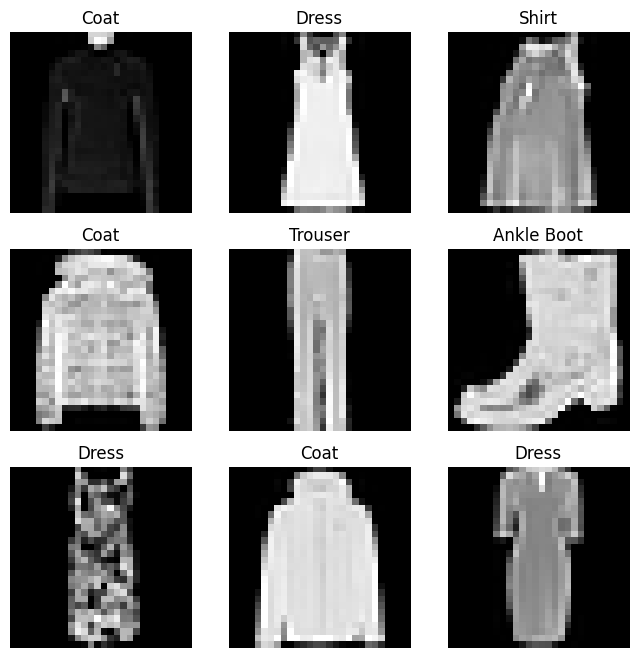

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [5]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  # dataset 객체가 생성될 때 한 번만 실행됨. 이미지와 주석 파일이 포함된 디렉토리와 두가지 변형을 초기화
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  # 데이터셋 샘플 개수 반환
  def __len__(self):
    return len(self.img_labels)

  # 주어진 인덱스에 해당하는 샘플을 데이터셋에서 불러오고 반환.
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

In [7]:
from torch.utils.data import DataLoader

# 데이터셋 feature를 가져오고 하나의 샘플에 정답(label)을 지정하는 일.
# 모델 학습할 때 일반적으로 샘플들을 미니배치로 전달하고 매 epoch마다 데이터를 다시 섞어서 과적합을 막음.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


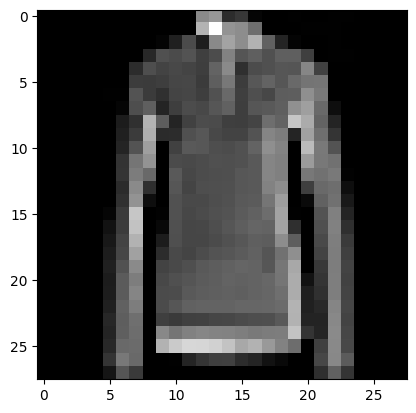

Label: 2


In [10]:
# 데이터셋 iterate
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

# 3. 변형(transform)

In [11]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

# tranform -> 특징 변경, target_transform -> 정답(label) 변경
# ToTensor는 PIL Image나 numpy를 float tensor로 변환하고
# 이미지의 픽셀 크기를 [0., 1.] 크기에 비례하여 조정
ds = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    # 크기 10짜리 zero tensor를 만들고 scatter_를 호출하여 정답 y에 해당하는 인덱스에 value=1을 할당
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# 4. 신경망 모델 구성하기

In [12]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [14]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [15]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [22]:
x = torch.rand(1, 28, 28, device=device)
# dim=0은 각 class에 대한 예측값 10개, dim=1에는 각 출력의 개별 값들이 해당됨
logits = model(x)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([2], device='cuda:0')


In [23]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [24]:
# 28*28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 반환
# dim=0. 3인 미니배치 차원은 유지됨
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [25]:
# linear
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [26]:
#비선형 활성화 모델 relu.
print(f'Before ReLU: {hidden1}\n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After ReLU: {hidden1}')

Before ReLU: tensor([[-0.7127,  0.3712,  0.0687, -0.1443, -0.1434,  0.3259,  0.1844,  0.2689,
         -0.2522, -0.2230,  0.1027, -0.4018,  0.0871,  0.3495, -0.0799,  0.1904,
          0.0560,  0.0697,  0.6357,  0.0850],
        [-0.4142,  0.5245, -0.0674,  0.1960, -0.2181,  0.0816,  0.3651, -0.1253,
         -0.0145,  0.0777, -0.1928, -0.6270,  0.1107,  0.5989,  0.2453,  0.4614,
         -0.2241,  0.1756,  0.5153,  0.4384],
        [-0.2275,  0.2542, -0.0426,  0.1087, -0.1382,  0.3654,  0.5480, -0.0574,
          0.1972, -0.2998, -0.1204, -0.7160,  0.3244,  0.2988,  0.4451,  0.4299,
          0.0920,  0.0671,  0.3179, -0.0564]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.3712, 0.0687, 0.0000, 0.0000, 0.3259, 0.1844, 0.2689, 0.0000,
         0.0000, 0.1027, 0.0000, 0.0871, 0.3495, 0.0000, 0.1904, 0.0560, 0.0697,
         0.6357, 0.0850],
        [0.0000, 0.5245, 0.0000, 0.1960, 0.0000, 0.0816, 0.3651, 0.0000, 0.0000,
         0.0777, 0.0000, 0.0000, 0.1107, 0.5989, 0.24

In [28]:
# nn.sequential: 순서를 갖는 모듈 컨테이너
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)

input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [29]:
# nn.softmax [0,1] 범위로 비례하여 조정됨.
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [30]:
# 학습 중에 최적화되는 가중치와 편향과 연관지어지는 모델 매개변수.
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0337,  0.0248, -0.0098,  ...,  0.0209,  0.0126, -0.0271],
        [-0.0235,  0.0282, -0.0352,  ..., -0.0113, -0.0045,  0.0346]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([6.7025e-05, 1.0975e-03], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0282,  0.0104,  0.0441,  ..., -0.0295, -0.0225,  0.0363],
        [-0.0246, -0.0255,  0.0046,  ...,  0.0033, -0.0167, -0.0133]],
       device='cuda:0', grad_

# 5. torch.autograd를 사용한 자동 미분

In [31]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [32]:
#gradient function: 역방향 전파 함수
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f09b1fe6d10>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f09b1fe64a0>


In [33]:
# gradient 계산하기
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0229, 0.3130, 0.3287],
        [0.0229, 0.3130, 0.3287],
        [0.0229, 0.3130, 0.3287],
        [0.0229, 0.3130, 0.3287],
        [0.0229, 0.3130, 0.3287]])
tensor([0.0229, 0.3130, 0.3287])


In [34]:
# 기본적으로, requires_grad=True인 모든 텐서들은 연산 기록을 추적하고 변화도 계산을 지원
z = torch.matmul(x,w)+b
print(z.requires_grad)

# no_grad() -> 연산 추적 멈추기
with torch.no_grad():
  z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [35]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [36]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


# 6. 모델 매개변수 최적화하기

In [37]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [38]:
# hyperparameter
learning_rate = 1e-3
batch_size = 64
epochs = 5 # 최적화 단계의 각 반복

In [39]:
# 손실 함수 초기화
loss_fn = nn.CrossEntropyLoss()

In [40]:
# 최적화 알고리즘. SGD(확률적 경사하강법)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 학습 단계 3단계
1. optimizer.zero_grad() 모델 매개변수의 변화도 재설정
2. loss.backward() 예측 손실(prediction loss) 역전파
3. 변화도 계산한 뒤에는 optimizer.step() 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정

In [41]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    # 예측과 손실 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0,0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1)==y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.296306  [   64/60000]
loss: 2.286967  [ 6464/60000]
loss: 2.259953  [12864/60000]
loss: 2.258902  [19264/60000]
loss: 2.228950  [25664/60000]
loss: 2.199874  [32064/60000]
loss: 2.209717  [38464/60000]
loss: 2.164163  [44864/60000]
loss: 2.157124  [51264/60000]
loss: 2.131689  [57664/60000]
Test Error: 
 Accuracy: 47.0%, Avg loss: 2.122106 

Epoch 2
-------------------------------
loss: 2.125559  [   64/60000]
loss: 2.120536  [ 6464/60000]
loss: 2.047503  [12864/60000]
loss: 2.074518  [19264/60000]
loss: 2.000707  [25664/60000]
loss: 1.939570  [32064/60000]
loss: 1.976884  [38464/60000]
loss: 1.879202  [44864/60000]
loss: 1.879902  [51264/60000]
loss: 1.811921  [57664/60000]
Test Error: 
 Accuracy: 55.2%, Avg loss: 1.812406 

Epoch 3
-------------------------------
loss: 1.836476  [   64/60000]
loss: 1.817834  [ 6464/60000]
loss: 1.682910  [12864/60000]
loss: 1.741016  [19264/60000]
loss: 1.615777  [25664/60000]
loss: 1.578568  [32064/600

# 7. 모델 저장하고 불러오기

In [44]:
import torch
import torchvision.models as models

In [45]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 78.5MB/s]


In [47]:
model = models.vgg16() # weights 지정하지 않았으므로 학습되지 않은 모델을 생성
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [48]:
torch.save(model, 'model.pth')
model = torch.load('model.pth')